# Creating Variables

In [3]:
# Libraries to install
# %pip install pandas-profiling

from datetime import timedelta
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
%matplotlib inline

#### Load in the cleaned data set.

In [2]:
%time
mydata = pd.read_csv('clean_card_transactions.csv')

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs


In [3]:
mydata.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
mydata

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [5]:
mydata['Date']= pd.to_datetime(mydata['Date'])

In [6]:
mydata['Cardnum'] = mydata['Cardnum'].astype(str)

In [7]:
mydata.dtypes

Recnum                        int64
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

### Creating Entities

List of entities I want to use:
- Card Number
- Merchant Number 
- Card Number + Merchant Number 
- Card Number + Merchant Description
- Card Number + Merchant State
- Card Number + Merchant Zip
- Merchant Number + Merchant State
- Merchant Number + Merchant Zip 
- Card Number + Merchant Number + Merchant Zip
- Card Number + Merchant Number + Merchant State

In [8]:
# Create the entities
mydata['card_merchnum'] = mydata['Cardnum'] + mydata['Merchnum']
mydata['card_merchdesc'] = mydata['Cardnum'] + mydata['Merch description']
mydata['card_state'] = mydata['Cardnum'] + mydata['Merch state']
mydata['card_zip'] = mydata['Cardnum'] + mydata['Merch zip']

mydata['merchnum_state'] = mydata['Merchnum'] + mydata['Merch state']
mydata['merchnum_zip'] = mydata['Merchnum'] + mydata['Merch zip']

mydata['card_merchnum_zip'] = mydata['Cardnum'] + mydata['Merchnum'] + mydata['Merch zip']
mydata['card_merchnum_state'] = mydata['Cardnum'] + mydata['Merchnum'] + mydata['Merch state']

In [40]:
mydata['card_merchdesc_zip'] = mydata['Cardnum'] + mydata['Merch description'] + mydata['Merch zip']
mydata['card_merchdesc_state'] = mydata['Cardnum'] + mydata['Merch description'] + mydata['Merch state']

To help with computing power/memory need to break up the entities. Manually change the call in the beginning of the 'for' loop to add the different variables for the various entities.

In [9]:
entities = ['Cardnum', 'Merchnum', 'card_merchnum']
entities2 = ['card_merchdesc', 'card_state', 'card_zip']
entities3 = ['merchnum_state']
entities4 = ['merchnum_zip']
entities5 = ['card_merchnum_zip']
entities6 = ['card_merchnum_state']

In [43]:
entities7 = ['card_merchdesc_zip']
entities8 = ['card_merchdesc_zip']

In [10]:
df1 = mydata.copy()
final = mydata.copy()
df1['check_date'] = df1['Date']
df1['check_record'] = df1['Recnum']

In [11]:
start = timeit.default_timer()

In [44]:
for entity in entities7:        
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: print('')    
    st = timeit.default_timer()    
    
    ## Day-since variables:       
    df_l = df1[['Recnum', 'Date', entity]]    
    df_r = df1[['check_record', 'check_date', entity, 'Amount']] 
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
        .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days    
    final[entity + '_day_since'] = final.Recnum.map(mapper)    
    # if first time we have seen it, use 365
    final[entity + '_day_since'].fillna((365), inplace = True)
    print('\n' + entity + '_day_since ---> Done')
    
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))


Run time for the last entity ----------------- 481.0708074250001s


KeyError: "['card_merchdesc_zip'] not in index"

In [35]:
for entity in entities6:
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: print('')    
    st = timeit.default_timer()    
           
    df_l = df1[['Recnum', 'Date', entity]]    
    df_r = df1[['check_record', 'check_date', entity, 'Amount']] 
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)
    
    ## Frequency & Amount variables:       
    for time in [0,1,3,7,14,30,180]:               
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]               
        col_name = entity + '_count_' + str(time)            
        mapper2 = temp2.groupby('Recnum')[entity].count()  
        final[col_name] = final.Recnum.map(mapper2)                
        print(col_name + ' ---> Done')               
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/toal_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]               
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')
        
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))

Run time for the last entity ----------------- 4.517444490999878s
card_merchnum_state_count_0 ---> Done
card_merchnum_state amount variables over past 0 ---> Done
card_merchnum_state_count_1 ---> Done
card_merchnum_state amount variables over past 1 ---> Done
card_merchnum_state_count_3 ---> Done
card_merchnum_state amount variables over past 3 ---> Done
card_merchnum_state_count_7 ---> Done
card_merchnum_state amount variables over past 7 ---> Done
card_merchnum_state_count_14 ---> Done
card_merchnum_state amount variables over past 14 ---> Done
card_merchnum_state_count_30 ---> Done
card_merchnum_state amount variables over past 30 ---> Done
card_merchnum_state_count_180 ---> Done
card_merchnum_state amount variables over past 180 ---> Done
Total run time: 0.5534224167333301mins


In [36]:
start = timeit.default_timer()
# velocity change variables
for ent in entities6:    
    for d in ['0', '1', '3']:        
        for dd in ['7', '14', '30']:            
            final[ent + '_count_' + d + '_by_' + dd] = final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)

print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.02690494600005877s


In [37]:
final.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       ...
       'card_merchnum_state_actual/toal_180',
       'card_merchnum_state_count_0_by_7', 'card_merchnum_state_count_0_by_14',
       'card_merchnum_state_count_0_by_30', 'card_merchnum_state_count_1_by_7',
       'card_merchnum_state_count_1_by_14',
       'card_merchnum_state_count_1_by_30', 'card_merchnum_state_count_3_by_7',
       'card_merchnum_state_count_3_by_14',
       'card_merchnum_state_count_3_by_30'],
      dtype='object', length=748)

Exporting csv file with Candidate Variables:

In [38]:
final.to_csv('cc_transactions_created_variables.csv')

In [46]:
final.shape

(96397, 748)

In [45]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,card_merchnum_state_actual/toal_180,card_merchnum_state_count_0_by_7,card_merchnum_state_count_0_by_14,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.500000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,...,0.134416,0.142857,0.035714,0.016667,0.142857,0.035714,0.016667,0.142857,0.035714,0.016667
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,...,0.487870,0.142857,0.071429,0.011111,0.142857,0.071429,0.011111,0.142857,0.071429,0.011111


Exporting excel file with all candidate variables and statistics.
- variable name, max, min, mean, stdev

In [106]:
candidate_variable_stats = final.describe().transpose()

In [107]:
candidate_variable_stats.to_excel('candidate_variable_stats.xlsx')

## Target Encoded Variables

Separate modeling date and OOT data.

Modeling data should have removed the first 2 months and last 4 months of the year.

OOT data is the last 4 months of the year.

In [4]:
final = pd.read_csv('cc_transactions_created_variables.csv')

In [5]:
final['Date'] = pd.to_datetime(final['Date'])

In [6]:
final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
modeling_data = final[(final['Date'] < '2010-09-01')] #& (final['Date'] >= '2010-03-01')]
modeling_data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,card_merchnum_state_actual/toal_180,card_merchnum_state_count_0_by_7,card_merchnum_state_count_0_by_14,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.500000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69041,69291,5142196230,2010-08-31,720306361800,HEALTH EFFECTS INSTITUTE,MA,2139.0,P,340.00,0,...,0.369565,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
69042,69292,5142211054,2010-08-31,6170023382,THOMAS SCIENTIFIC,NJ,8085.0,P,133.00,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
69043,69293,5142225264,2010-08-31,8915900690006,GLOBAL COMPUTER SUPPLY,IL,60540.0,P,170.00,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
69044,69294,5142269485,2010-08-31,6070073890062,HOME DEPOT #4617,VA,22150.0,P,100.96,0,...,0.771276,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333


In [8]:
oot_data = final[final['Date']>= '2010-09-01']
oot_data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,card_merchnum_state_actual/toal_180,card_merchnum_state_count_0_by_7,card_merchnum_state_count_0_by_14,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30
69046,69296,5142121708,2010-09-01,3830819800365,STAR OFFICE PRODUCTS INC,DC,20006.0,P,622.20,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
69047,69297,5142211606,2010-09-01,679076000817,LOYOLA BLAKEFIELD,MD,21204.0,P,350.00,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
69048,69298,5142124669,2010-09-01,9900000034106,GSA/CUST SUPPLY CTR 94,PA,19107.0,P,23.77,0,...,0.034747,0.071429,0.035714,0.016667,0.071429,0.035714,0.016667,0.071429,0.035714,0.016667
69049,69299,5142210384,2010-09-01,400004090307,VISION COMPUTER WORKS,CA,90291.0,P,566.28,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
69050,69300,5142230181,2010-09-01,465616626335,OXFORD UNIV PRESS,NC,27513.0,P,60.75,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,...,0.134416,0.142857,0.035714,0.016667,0.142857,0.035714,0.016667,0.142857,0.035714,0.016667
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,...,0.487870,0.142857,0.071429,0.011111,0.142857,0.071429,0.011111,0.142857,0.071429,0.011111


## Target encoded variables

In [9]:
c = 4
nmid = 20

### Weekday Target Encoded Variable

In [10]:
fraud_avg = modeling_data['Fraud'].mean()
modeling_data['weekday'] = modeling_data['Date'].apply(dt.date.weekday)

<ipython-input-10-7839b114a95f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_data['weekday'] = modeling_data['Date'].apply(dt.date.weekday)


In [11]:
fraud_weekday = modeling_data.groupby(['weekday'])['Fraud'].mean()
num_instances_weekday = modeling_data.groupby(['weekday']).size()

fraud_weekday_smooth = fraud_avg + (fraud_weekday - fraud_avg) / (1 + np.exp(-(num_instances_weekday - nmid)/c))
modeling_data['weekday_risk'] = modeling_data['weekday'].map(fraud_weekday_smooth)

<ipython-input-11-ad9ad5d61162>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_data['weekday_risk'] = modeling_data['weekday'].map(fraud_weekday_smooth)


In [12]:
modeling_data[['Recnum','Date', 'Fraud', 'weekday', 'weekday_risk']]

,Recnum,Date,Fraud,weekday,weekday_risk
0,1,2010-01-01,0,4,0.040022
1,2,2010-01-01,0,4,0.040022
2,3,2010-01-01,0,4,0.040022
3,4,2010-01-01,0,4,0.040022
4,5,2010-01-01,0,4,0.040022
...,...,...,...,...,...
69041,69291,2010-08-31,0,1,0.006652
69042,69292,2010-08-31,0,1,0.006652
69043,69293,2010-08-31,0,1,0.006652
69044,69294,2010-08-31,0,1,0.006652


In [13]:
modeling_data['weekday_risk'] = modeling_data['weekday_risk'].astype(object)

<ipython-input-13-3f1fad7061f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_data['weekday_risk'] = modeling_data['weekday_risk'].astype(object)


<AxesSubplot:xlabel='weekday'>

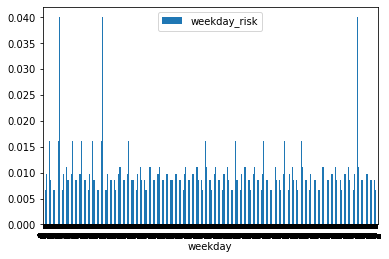

In [14]:
# takes a bit to run
# modeling_data.plot(kind='bar', x='weekday', y='weekday_risk')

weekday
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: weekday_risk, dtype: object

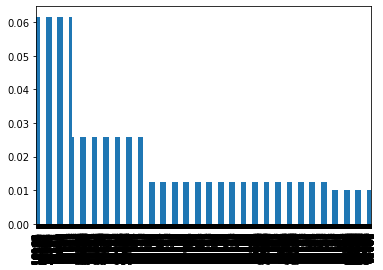

In [31]:
modeling_data.groupby(['weekday'])['weekday_risk'].plot(kind='bar', x='weekday', y='weekday_risk')

In [30]:
modeling_data.dtypes

Recnum                                        int64
Cardnum                                       int64
Date                                 datetime64[ns]
Merchnum                                     object
Merch description                            object
                                          ...      
card_merchnum_state_count_3_by_7            float64
card_merchnum_state_count_3_by_14           float64
card_merchnum_state_count_3_by_30           float64
weekday                                       int64
weekday_risk                                 object
Length: 750, dtype: object

### State Target Encoded Variable

In [15]:
c = 4
nmid = 20
fraud_avg = modeling_data['Fraud'].mean()

In [16]:
fraud_state = modeling_data.groupby(['Merch state'])['Fraud'].mean()
num_instances_state = modeling_data.groupby(['Merch state']).size()

fraud_state_smooth = fraud_avg + (fraud_state - fraud_avg) / (1 + np.exp(-(num_instances_state - nmid)/c))
modeling_data['state_risk'] = modeling_data['Merch state'].map(fraud_state_smooth)

<ipython-input-16-a7b50a8899c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_data['state_risk'] = modeling_data['Merch state'].map(fraud_state_smooth)


In [17]:
modeling_data[['Recnum','Merch state', 'Fraud', 'state_risk']]

,Recnum,Merch state,Fraud,state_risk
0,1,TN,0,0.008747
1,2,MA,0,0.002046
2,3,MD,0,0.020811
3,4,TN,0,0.008747
4,5,TN,0,0.008747
...,...,...,...,...
69041,69291,MA,0,0.002046
69042,69292,NJ,0,0.001847
69043,69293,IL,0,0.002393
69044,69294,VA,0,0.013827


In [18]:
modeling_data['state_risk'] = modeling_data['state_risk'].astype(object)

<ipython-input-18-4eac0219ffe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_data['state_risk'] = modeling_data['state_risk'].astype(object)


In [19]:
modeling_data.dtypes

Recnum                                        int64
Cardnum                                       int64
Date                                 datetime64[ns]
Merchnum                                     object
Merch description                            object
                                          ...      
card_merchnum_state_count_3_by_14           float64
card_merchnum_state_count_3_by_30           float64
weekday                                       int64
weekday_risk                                 object
state_risk                                   object
Length: 751, dtype: object

<AxesSubplot:xlabel='Merch state'>

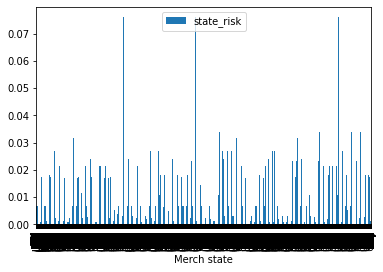

In [43]:
modeling_data.plot.bar(x='Merch state', y='state_risk')

In [20]:
modeling_data.to_csv('modeling_data.csv')

In [45]:
oot_data.to_csv('out_of_time_data.csv')